<a href="https://colab.research.google.com/github/sbht04/ai-agents/blob/main/LangChain_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langchain-chroma langchain-openai
!pip install beautifulsoup4
!pip install langchain-community
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00

In [ ]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Simple LLM Call

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])

In [ ]:
answer = llm.invoke("how can langsmith help with testing?")

In [ ]:
print(answer)

content='Langsmith can help with testing by providing automation tools, frameworks, and libraries that enable software developers and quality assurance engineers to write and run tests more efficiently. With Langsmith, you can easily create and execute test scripts, generate test data, perform unit testing, integration testing, and end-to-end testing. Additionally, Langsmith can help in test management, reporting, and analysis to facilitate the quick identification of bugs and issues in the software development process. Ultimately, Langsmith can speed up the testing process and improve the overall quality of software products.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 15, 'total_tokens': 125, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-

# That's not very interesting ... and there is no chaining anyways

# Let's Do Some Chaining

## Templating

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot. Your name is {name}."),
    ("human", "Hello, how are you doing?"),
    ("ai", "I'm doing well, thanks!"),
    ("human", "{user_input}"),
])

prompt_value = template.invoke(
    {
        "name": "Bob",
        "user_input": "What is your name?"
    }
)
# Output:
# ChatPromptValue(
#    messages=[
#        SystemMessage(content='You are a helpful AI bot. Your name is Bob.'),
#        HumanMessage(content='Hello, how are you doing?'),
#        AIMessage(content="I'm doing well, thanks!"),
#        HumanMessage(content='What is your name?')
#    ]
#)

In [ ]:
for msg in prompt_value.messages:
  print(type(msg).__name__, ":", msg.content)

SystemMessage : You are a helpful AI bot. Your name is Bob.
HumanMessage : Hello, how are you doing?
AIMessage : I'm doing well, thanks!
HumanMessage : What is your name?


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world class technical documentation writer."),
    ("user", "{input}")
])

In [ ]:
for msg in prompt.messages:
  print(type(msg).__name__, ":", msg)

SystemMessagePromptTemplate : prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.') additional_kwargs={}
HumanMessagePromptTemplate : prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}') additional_kwargs={}


## Chaining

In [ ]:
chain = prompt | llm
## pass the prompt to the LLM

In [ ]:
print(chain.first)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


In [ ]:
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

"system": "You are a world class technical documentation writer."

"user", "how can langsmith help with testing?"

In [ ]:
print(chain_result.content)

Langsmith is a powerful tool that can greatly assist in the testing process by enabling automated language-related testing tasks. Here are some ways Langsmith can help with testing:

1. **Automated language quality assessment**: Langsmith can analyze and assess the quality of the language used in the software being tested. It can check for grammar, spelling, punctuation errors, as well as style consistency.

2. **Localization testing**: Langsmith can help test the localization readiness of the software by checking for proper translation, cultural appropriateness, and language consistency across different locales.

3. **Machine translation evaluation**: Langsmith can evaluate the accuracy and quality of machine translations used in the software to ensure that the translations are understandable and contextually appropriate.

4. **Language-specific functionality testing**: For software that relies on language-specific functionality, Langsmith can help test features like spell check, auto

In [ ]:
print(chain_result.response_metadata)

{'token_usage': {'completion_tokens': 256, 'prompt_tokens': 28, 'total_tokens': 284, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}


# More Chaining

In [ ]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [ ]:
chain = prompt | llm | output_parser

In [ ]:
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

In [ ]:
print(chain_result)

Langsmith is a powerful tool that can greatly assist with testing by providing automated language analysis and processing capabilities. Here are some ways in which Langsmith can help with testing:

1. Automated Language Processing: Langsmith can analyze and process different language inputs, such as text, speech, or code snippets. This can help in testing applications that involve natural language processing or language-specific features.

2. Grammar and Syntax Checking: Langsmith can check the grammar and syntax of text inputs, which can be useful for testing applications that rely on correct language usage, such as writing assistants or communication tools.

3. Code Analysis: Langsmith can analyze code snippets written in different programming languages. This can help in testing software applications by identifying potential coding errors, checking for best practices, and ensuring code quality.

4. Test Data Generation: Langsmith can generate realistic and diverse language data for t

# Where are the retrieval from <u>**R**</u>AG

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")

docs = loader.load()

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""", output_parser = output_parser)

document_chain = create_stuff_documents_chain(llm, prompt)
# document_chain = prompt | llm

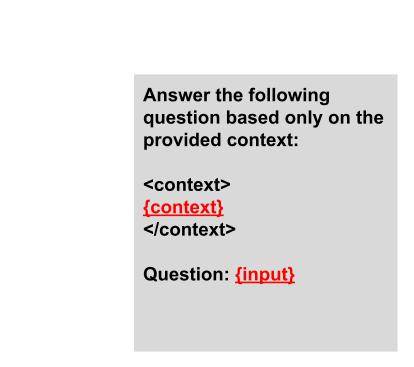

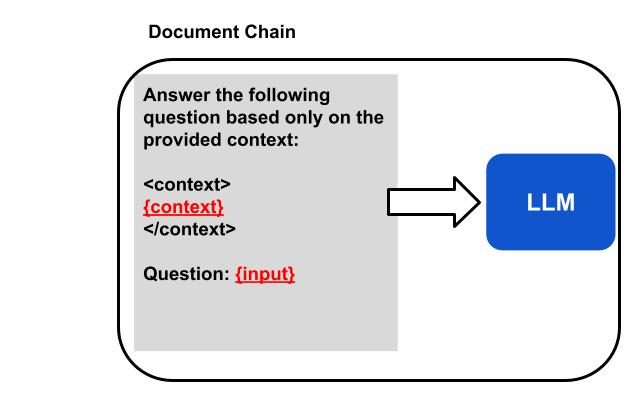

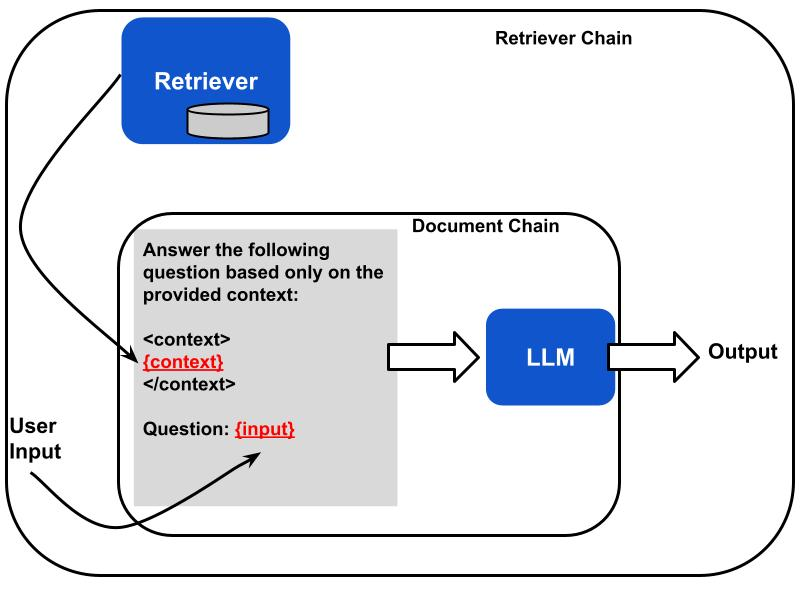

In [ ]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

In [ ]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})

In [ ]:
print(response["answer"])

# LangSmith offers several features that can help with testing:...

LangSmith can help with testing by allowing developers to create datasets with collections of inputs and reference outputs to run tests on LLM applications. These test cases can be uploaded in bulk, created on the fly, or exported from application traces. LangSmith also facilitates custom evaluations (both LLM and heuristic-based) to score test results. Additionally, LangSmith offers a comparison view to track and diagnose regressions in test scores across multiple revisions of the application. The platform also provides a playground environment for rapid iteration and experimentation, allowing users to test out different prompts and models quickly.
